<span style="font-family:Lucida Sans Typewriter">
<font size="4.5"> 1.
Project Overview

<span style="font-family:Georgia">
The purpose of this project is to explore the data in order to extract meaningful insights and to analyse sales, profit, inventory management process and provide recommendations for optimization. 


<u><span style="font-family:Lucida Sans Typewriter">Objectives:</u>
<font size="3"> <br><br>
<span style="font-family:Georgia">Extracting meaningful business insights related to purchase and sales by answering the following questions:
<li>What is the average order execution period for each vendor ?
<li>Does prices fluctuate from the beginning of the year to the end of closing year?
<li>What are the sales trends throughout the year?
<li> Which products sell the most in terms of quantity ?
<li> Which products generates high profit compared to the volume sold?
<li>How much of the products are purchased and what are their costs in a single month?
<li>Identify areas to reduce excess inventory.</li>

<span style="font-family:Lucida Sans Typewriter">
<font size="4.5">2. Exploratory Analysis


<span style="font-family:Georgia">Here we develop an overview that includes key details about the datasets, such as data types, structure, and summary statistics. <br>
    <br>
<span style="font-family:Georgia"> The ABC company has six datasets for year ending 2016. These are - <br>
<li><span style="font-family:Georgia">Beginning Inventory <li><span style="font-family:Georgia">Ending Inventory <li><span style="font-family:Georgia">Purchase Price <li><span style="font-family:Georgia"> Purchase Invoice <li><span style="font-family:Georgia">Sales Data <li><span style="font-family:Georgia">Purchase</span>

<span style="font-family:Lucida Sans Typewriter">
<font size="3">2.1 Import Libraries

In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

<span style="font-family:Lucida Sans Typewriter">
<font size="3">2.2 Load Data

In [9]:
#Define the directory to store CSV files

directory = 'c:/users/sharo/Downloads/Inventory Sales/'

# Map each CSV filename to desired variable name "file_to_var"
file_to_var = { '2017PurchasePricesDec.csv': 'Purchase_price',
               'BegInvFINAL12312016.csv': 'BegInv',
               'EndInvFINAL12312016.csv': 'EndInv',
               'InvoicePurchases12312016.csv': 'Invoice',
               'PurchasesFINAL12312016.csv': 'Purchase',
               'SalesFINAL123120160.csv': 'Sales'}

#dictionary to store the Dataframes

dataframes = {}

# Loop through filenames and load each CSV into a dynamically named DataFrame
# Using items() to iterate over both the keys and values of the dictionary simultaneously.
for filename, var_name in file_to_var.items():
    file_path = os.path.join(directory, filename)                  # constructs a full file path
    if os.path.exists(file_path):                                  # check if file exists
        dataframes[var_name] = pd.read_csv(file_path)              # loads CSV into dataframe
        print(f"Loaded {filename} into DataFrame '{var_name}'")
    else:
        print(f"File {filename} does not exist at {file_path}")

globals().update(dataframes)

Loaded 2017PurchasePricesDec.csv into DataFrame 'Purchase_price'
Loaded BegInvFINAL12312016.csv into DataFrame 'BegInv'
Loaded EndInvFINAL12312016.csv into DataFrame 'EndInv'
Loaded InvoicePurchases12312016.csv into DataFrame 'Invoice'
Loaded PurchasesFINAL12312016.csv into DataFrame 'Purchase'
Loaded SalesFINAL123120160.csv into DataFrame 'Sales'


In [10]:
#Calculate Unique Values in BegInv and EndInv columns

uniques = {"BegInv": BegInv.nunique(), "EndInv": EndInv.nunique()}
print(uniques)

{'BegInv': InventoryId    206529
Store              79
City               67
Brand            8094
Description      7291
Size               41
onHand            474
Price             329
startDate           1
dtype: int64, 'EndInv': InventoryId    224489
Store              80
City               67
Brand            9653
Description      8732
Size               47
onHand            548
Price             354
endDate             1
dtype: int64}


In [11]:
print(Sales.columns)
print(Purchase.columns)
print(Invoice.columns)
print(EndInv.columns)
print(BegInv.columns)
print(Purchase_price.columns)

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNumber', 'VendorName'],
      dtype='object')
Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')
Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')
Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')
Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')
Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'Purchas

In [12]:
#Counting any NA values
Purchase_price.isna().sum
BegInv.isna().sum
EndInv.isna().sum
Invoice.isna().sum
Purchase.isna().sum 
Sales.isna().sum

<bound method DataFrame.sum of          InventoryId  Store  Brand  Description   Size  SalesQuantity  \
0              False  False  False        False  False          False   
1              False  False  False        False  False          False   
2              False  False  False        False  False          False   
3              False  False  False        False  False          False   
4              False  False  False        False  False          False   
...              ...    ...    ...          ...    ...            ...   
1048570        False  False  False        False  False          False   
1048571        False  False  False        False  False          False   
1048572        False  False  False        False  False          False   
1048573        False  False  False        False  False          False   
1048574        False  False  False        False  False          False   

         SalesDollars  SalesPrice  SalesDate  Volume  Classification  \
0               Fals

<span style="font-family:Georgia">There is no NA values to be found the datasets

In [14]:
#Mean price of beginning inventories and mean price of ending inventories
print(np.mean(BegInv['Price']));
print(np.mean(EndInv['Price']));

22.253910104634222
23.585582946157718


<span style="font-family:Lucida Sans Typewriter">
<font size="4.5">3. Inventory Analysis

<span style="font-family:Georgia">Inventory prices in both beginning inventory and ending inventory has some differences. Prices in the ending inventory are higher for some stores when we compare it to the beginning inventory sale prices.


<span style="font-family:Lucida Sans Typewriter">
<font size="3">3.1 Beginning inventory Price of items in each Store(code) 


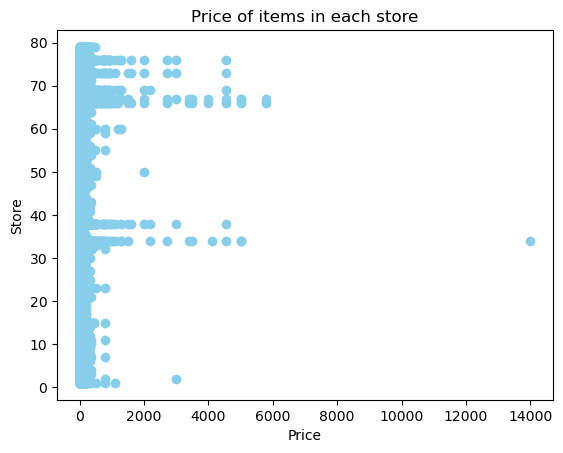

In [18]:
# Scatter plot of beginning inventory item prices in each Store(code) 
plt.scatter(BegInv['Price'],BegInv['Store'], color ='skyblue')
plt.title('Price of items in each store')
plt.xlabel('Price')
plt.ylabel('Store')
plt.show()

<span style="font-family:Lucida Sans Typewriter">
<font size="3">3.2 Enging inventory Price of items in each Store(code) 


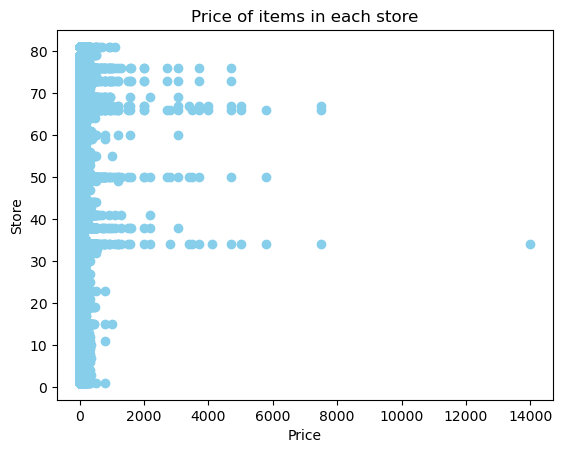

In [20]:
# Scatter plot of ending inventory item prices in each Store(code) 
plt.scatter(EndInv['Price'],EndInv['Store'], color ='skyblue')
plt.title('Price of items in each store')
plt.xlabel('Price')
plt.ylabel('Store')
plt.show()

<span style="font-family:Lucida Sans Typewriter">
<font size="4.5">4. Lead Time Analysis

<span style="font-family:Georgia">Lead time is the duration between when an order is placed with a suplier and when the goods are received. It is calculated as : <br><b> Lead time = Purchase receiving date - Purchase order dateDate.</b><br>
Because this is a large dataset, only the top highest average lead time and the lowest average lead time is shown in the chart. The longest lead time was 12 days and the lowest average lead time was 7 to 8 days. The company may want to reconsider vendors like Phillips Products Co., E&J Gallo, Palm Bay Intl, Costellation Brand which takes longest time to fulfill the order. It may be a good idea to order supplies from PSP Wines, Hood River Distillers, Badrizia Spirits etc for quicker delivery in case of urgent orders.


In [23]:
#Converting Dates to Datetime
Purchase['PODate'] = pd.to_datetime(Purchase['PODate'])
Purchase['ReceivingDate'] = pd.to_datetime(Purchase['ReceivingDate'])

#Calculate Lead Time 
Purchase['Lead-Time']= (Purchase['ReceivingDate'] - Purchase['PODate']).dt.days

#
top_15_vendors = vendorleadtime.sort_values(by ='Lead-Time', ascending = False).head(10)

# Setting Y axis range from 0 to max leadtime + 5 more labels
y_min = 0
y_max = top_15_vendors['Lead-Time'].max() + 5  # Adding some padding for better visualization

# Plot Bar Chart of Lead Times for top 15 vendors
fig = px.bar(
    top_15_vendors,
    x='VendorName',
    y='Lead-Time',
    title='Vendors with the HIGHEST average lead time',
    labels={'VendorName': 'Vendor Name', 'Lead-Time': 'Average Lead Time (Days)'},
    text='Lead-Time',  # Display text on bars
    color='Lead-Time',  # Color bars by lead time
    color_continuous_scale='Blues'  # Color scale
  
)

# Update y-axis range
fig.update_yaxes(range=[y_min, y_max])

fig.show()

top_15_vendors = vendorleadtime.sort_values(by ='Lead-Time', ascending = True).head(10)

# Setting Y axis range from 0 to max leadtime + 5 more labels
y_min = 0
y_max = top_15_vendors['Lead-Time'].max() + 5  # Adding some padding for better visualization

# Plot Bar Chart of Lead Times for top 15 vendors
fig = px.bar(
    top_15_vendors,
    x='VendorName',
    y='Lead-Time',
    title= 'Vendors with the LOWEST average lead time',
    labels={'VendorName': 'Vendor Name', 'Lead-Time': 'Average Lead Time (Days)'},
    text='Lead-Time',  # Display text on bars
    color='Lead-Time',  # Color bars by lead time
    color_continuous_scale='Blues'  # Color scale
  
)

# Update y-axis range
fig.update_yaxes(range=[y_min, y_max])

fig.show()

NameError: name 'vendorleadtime' is not defined

<span style="font-family:Lucida Sans Typewriter">
<font size="4.5">5. SALES TREND ANALYSIS

<span style="font-family:Georgia">From the pattern observed in the chart for monthly sales, we see that the summer months, long weekends like 4th of July, holidays like Thanksgiving and Christmas might have high impact on the increasing sales. For off-season months between February to June, in order to maintain profits, we could consider offering discounts and packages to increase company's sales.

In [ ]:
#Create new columns Order Month, Order Year, Order Day of Week using PayDate column
Invoice['PayDate'] = pd.to_datetime(Invoice['PayDate'])
Invoice['Order Month'] = Invoice['PayDate'].dt.month 
Invoice['Order Year'] = Invoice['PayDate'].dt.year
Invoice['Order Day of Week'] = Invoice['PayDate'].dt.dayofweek

In [ ]:
import plotly.express as px 
# plotly.express allows to plot interactive plots with minimun coding

In [ ]:
Monthly_Sales = Invoice.groupby('Order Month')['Quantity'].sum().reset_index()
fig = px.line(Monthly_Sales, x= 'Order Month', y = 'Quantity', title= 'Monthly Sales Analysis')
fig.show()

<span style="font-family:Georgia">Monthly sales quantity decreases from 3 Mil to 1 Mil in March. There is a steady increase in sales from June.

<span style="font-family:Lucida Sans Typewriter">
<font size="3"> Sales Performance by top products. Number of products ordered vs. number of products sold

In [ ]:
description_counts = BegInv['Description'].value_counts()

# Get the top 10 descriptions
top_15_ordered = description_counts[:15]

plt.figure(figsize=(8,3))
plt.barh(top_15_ordered.index[::-1], top_15_ordered.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Quantity ordered')
plt.ylabel('Description')
plt.title('Top Ordered Products')

# Show the plot
plt.show()


In [ ]:
description_counts = EndInv['Description'].value_counts()

# Get the top 15 descriptions
top_15_sold = description_counts[:15]

plt.figure(figsize=(8,3))
plt.barh(top_15_sold.index[::-1], top_15_sold.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Quantity sold')
plt.ylabel('Description')
plt.title('Top Selling Products')

# Show the plot
plt.show()


<span style="font-family:Lucida Sans Typewriter">
<font size="4.5">6. PROFIT AND SALES ANALYSIS / REVENUE

<span style="font-family:Lucida Sans Typewriter">
<font size="3">6.1 Calculating top 10 products with overall highest sales amount and quantity

In [ ]:
#Merging sales and purchase data using common columns on sales_purch
sales_purch = pd.merge(Sales, Purchase[['Brand','PurchasePrice', 'Description', 'Size', 'InventoryId','VendorNumber', 'Store','VendorName']],
                       on=['InventoryId','VendorNumber', 'Store', 'Brand', 'Description','Size'])
sales_purch = sales_purch[['Brand', 'SalesQuantity', 'SalesPrice','PurchasePrice','Description','Size']]


In [ ]:
#Total sales for each product
sales_purch['TotalSales']= sales_purch['SalesQuantity'] * sales_purch['SalesPrice']

#Group by Product Description to get total sales for each product
total_sales_per_product = sales_purch.groupby(['Description', 'Size']).agg(Total_Sales=('TotalSales', 'sum'),
    Total_Quantity=('SalesQuantity', 'sum')).reset_index()
top_15_products = total_sales_per_product.sort_values( by = 'Total_Sales', ascending = False).head(10)


plt.figure(figsize=(14, 7))

# Define the bar width and positions
bar_width = 0.35
index = range(len(top_15_products))

# Plot Total Sales
plt.bar(index, top_15_products['Total_Sales'], bar_width, color='b', alpha=0.6, label='Total sum of sales')

# Plot Total Quantity
plt.bar([i + bar_width for i in index], top_15_products['Total_Quantity'], bar_width, color='red', alpha=0.6, label='Total Quantity')

# Add titles and labels
plt.title('Top 15 Products by Total Sales and Quantity')
plt.xlabel('Product')
plt.ylabel('Sales / Quantity')

# Set x-ticks with product descriptions
plt.xticks([i + bar_width / 2 for i in index], top_15_products['Description'], rotation=90)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))  # Adjust legend position to the right side

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

top_15_products = total_sales_per_product.sort_values( by = 'Total_Sales', ascending = True).head(10)


plt.figure(figsize=(14, 7))

# Define the bar width and positions
bar_width = 0.35
index = range(len(top_15_products))

# Plot Total Sales
plt.bar(index, top_15_products['Total_Sales'], bar_width, color='b', alpha=0.6, label='Total sum of sales')

# Plot Total Quantity
plt.bar([i + bar_width for i in index], top_15_products['Total_Quantity'], bar_width, color='red', alpha=0.6, label='Total Quantity')

# Add titles and labels
plt.title('Top 15 Products by Total Sales and Quantity')
plt.xlabel('Product')
plt.ylabel('Sales / Quantity')

# Set x-ticks with product descriptions
plt.xticks([i + bar_width / 2 for i in index], top_15_products['Description'], rotation=90)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))  # Adjust legend position to the right side

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

<span style="font-family:Georgia">Revenues generated from each prooduct are well above the quantity sold. It indicates a very high revenue. Comparing the heights of top performing 10 products with the lowest performing products, these products generates significant revenue per unit but does not sell as many units. This could suggest it is a high - priced item with fewer sales. Smirnoff peppermint twist is an exception where sales quantity is higher than revenue generation. This might be one of the few products the company would want to increase its prices as the demand for Smirnoff Peppermint looks promising. 

<span style="font-family:Lucida Sans Typewriter">
<font size="3">6.2 Profit and Sales volume 

<span style="font-family:Georgia">Profit is calculated as Profit=(Sales Price−Purchase Price) × Sales Quantity and is diplayed using bar chart. <br>We can compare products that eventhough sells less but generates has higher profit versus products that sells more with high profits.
Jack Daniels are selling less in volumes but yeilds more profit and Captain Morgan sells more and also yeilds high profit. Captain Morgan is the most favored liquor in the market.


In [ ]:
# Calculate Profit
sales_purch['Profit'] = (sales_purch['SalesPrice'] - sales_purch['PurchasePrice']) * sales_purch['SalesQuantity']

# Calculate total sales volume and profit per product
sales_volume_and_profit = sales_purch.groupby('Description').agg({
    'SalesQuantity': 'sum','Profit': 'sum' }).reset_index()

# Sort products by total sales volume in descending order and select top 10
top_products = sales_volume_and_profit.sort_values(by='SalesQuantity', ascending=False).head(10)

# Plot sales volume and profit using side-by-side bar charts
fig, ax1 = plt.subplots(figsize=(10, 11))

# Bar chart for sales volume
ax1.bar(top_products['Description'], top_products['SalesQuantity'], color='skyblue', label='Sales Volume')
ax1.set_xlabel('Product Description')
ax1.set_ylabel('Sales Volume', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top_products['Description'], rotation=90, ha='right')

# Add a second y-axis for profit
ax2 = ax1.twinx()
ax2.bar(top_products['Description'], top_products['Profit'], color='green', alpha=0.7, label='Profit', width=0.4)
ax2.set_ylabel('Profit', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding titles and legends
fig.suptitle('Top 10 Products by Sales Volume and Profit')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

<span style="font-family:Georgia"> Herein, products that sells more but yeilds less profits like Smirnoff 80 Proof, Smirnoff Rasberry Vodka and Jose Cuervo Especial are among the top 10 products, where they might not bring profit however, has high demand among customers.

<span style="font-family:Lucida Sans Typewriter">
<font size="4.5">7. Purchase Trend Analysis using Purchase and Invoice datasets

In [ ]:
#Convert Date to datetime
Invoice['PayDate'] = pd.to_datetime(Invoice['PayDate'])  
Purchase['PayDate'] = pd.to_datetime(Purchase['PayDate']) 

# merging Purchase and Invoice data
merge_df = pd.merge(Purchase, Invoice[['VendorNumber', 'PONumber','PayDate','Quantity','Dollars']], on = ['VendorNumber', 'PONumber'])

In [ ]:
#renaming columns to avoid conflicts between merged data
merge_df.rename(columns={
    'Dollars_x': 'purchasedollars',
    'Quantity_x': 'purchasequantity',
    'Dollars_y': 'invoicedollars',
    'Quantity_y': 'invoicequantity',
    'PayDate_x' : 'purchasedate',
    'PayDate_y' : 'invoicedate',
}, inplace=True)

In [ ]:
#calc total dollars and total quantity from Purchase data
total_dollars = merge_df['purchasedollars'].sum()
total_quantity= merge_df['purchasequantity'].sum()
print(f"Total Purchase Dollars: ${total_dollars:.2f}")
print(f"Total Purchase Quantity: {total_quantity}")

# Calculating total dollars and total quantity from Invoice data
total_invdollars =merge_df['invoicedollars'].sum()
total_invquantity = merge_df['invoicequantity'].sum()

# Plot Purchase Dollars over time
plt.figure(figsize=(12, 6))
plt.plot(merge_df['purchasedate'], merge_df['purchasedollars'], marker='o', linestyle='', color='b', label='Purchase Dollars', alpha =0.3)
plt.plot(merge_df['purchasedate'], merge_df['purchasequantity'], marker='o', linestyle='', color='red', label='Purchase Quantity', alpha=0.5)


plt.title('Purchase Dollars and Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Amont')
plt.grid(True)
plt.legend()
plt.show()


<span style="font-family:Georgia">There are data points that stands out which indicates the company invested in products with very high prices on February 2nd and February 19th.

<span style="font-family:Lucida Sans Typewriter">
<font size="4.5">8. Inventory Analysis


<span style="font-family:Georgia">Inventory analysis helps in optimizing stock levels, reduce costs, and improve customer satisfaction. We will consider the latest ending inventory level as onhand inventory and evaluate safety stock accordingly.

               InventoryId  Store          City  Brand  \
0        1_HARDERSFIELD_58      1  HARDERSFIELD     58   
1        1_HARDERSFIELD_62      1  HARDERSFIELD     62   
2        1_HARDERSFIELD_63      1  HARDERSFIELD     63   
3        1_HARDERSFIELD_72      1  HARDERSFIELD     72   
4        1_HARDERSFIELD_75      1  HARDERSFIELD     75   
...                    ...    ...           ...    ...   
172398  79_BALLYMENA_46985     79     BALLYMENA  46985   
172399  79_BALLYMENA_47014     79     BALLYMENA  47014   
172400  79_BALLYMENA_47090     79     BALLYMENA  47090   
172401  79_BALLYMENA_90011     79     BALLYMENA  90011   
172402  79_BALLYMENA_90089     79     BALLYMENA  90089   

                         Description   Size  onHand_x  Price_x     endDate  \
0        Gekkeikan Black & Gold Sake  750mL        11    12.99  2016-12-31   
1           Herradura Silver Tequila  750mL         7    36.99  2016-12-31   
2         Herradura Reposado Tequila  750mL         7    38.99  2016-

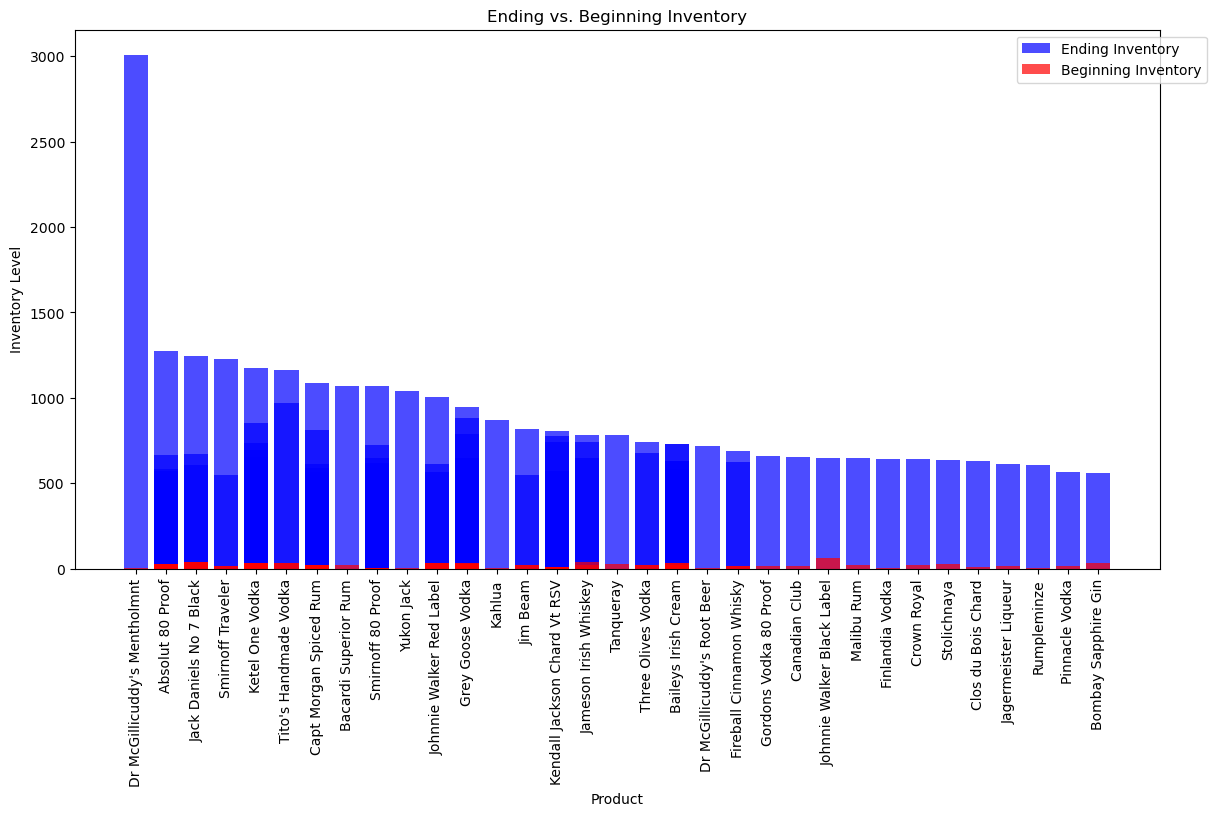

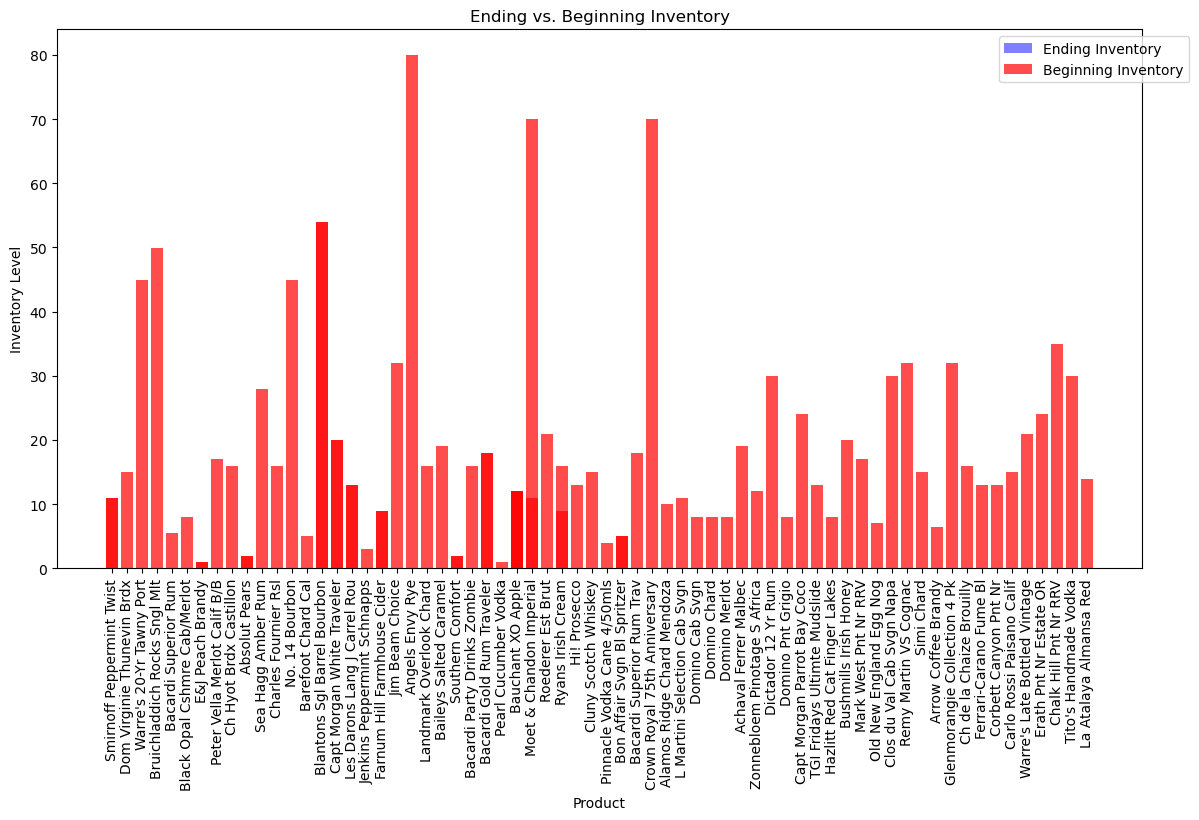

In [51]:
inv_data = pd.merge(EndInv, BegInv[['InventoryId', 'Description', 'onHand','Price']], on = ['InventoryId','Description'])
print(inv_data)
products = inv_data.sort_values( by= 'onHand_x', ascending = False).head(70)
plt.figure(figsize=(14, 7))
plt.bar(products['Description'], products['onHand_x'], color='b', alpha = 0.7, label='Ending Inventory')
plt.bar(products['Description'], products['Price_y'], color='red', alpha = 0.7, label='Beginning Inventory')

plt.title('Ending vs. Beginning Inventory')
plt.xlabel('Product')
plt.ylabel('Inventory Level')
plt.xticks(rotation =90)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1)) 


plt.show()

products2 = inv_data.sort_values( by= 'onHand_x', ascending = True).head(80)
plt.figure(figsize=(14, 7))

plt.bar(products2['Description'], products2['onHand_x'], color='b', alpha = 0.5, label='Ending Inventory')
plt.bar(products2['Description'], products2['Price_y'], color='red', alpha = 0.7, label='Beginning Inventory')

plt.title('Ending vs. Beginning Inventory')
plt.xlabel('Product')
plt.ylabel('Inventory Level')
plt.xticks(rotation =90)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1)) 

plt.show()



<span style="font-family:Georgia">Products having high ending inventory(blue bars) than beginning inventory(red bar) could be a major issue for the company without realizing that excess inventory comes with large holding costs. Increased blue bar means that the inventory of those products has increased from the beginning to the end of the period. This might suggest bad stock management or an increase in demand.
The company needs to address this by reducing surplus inventory and filling inventory shortages to maintain balance.
The company could further perform ABC analysis to categorize inventory into three groups: high-value, low quantity, moderate value, moderate quantity and low value,low quantity to focus on optimizing the management on high value, low quantity products as they have the most significant impact on company's profit. Considering investing on inventory management software with real time tracking can help stream line operations and provide visibility into inventory levels.